# PLANTILLA MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## IMPORTAR PAQUETES

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/isaac/Google Drive/DS4B/CursoMachineLearningPython/03_MACHINE_LEARNING/08_CASOS/00_PROYECTO1'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_final.pickle'
nombre_y = 'y_final.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [54]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [45]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]},
        
        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]},
        
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
        
        {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__scoring': ['roc_auc'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [10]:
# grid_search = GridSearchCV(estimator= pipe, 
#                            param_grid = grid, 
#                            cv = 3, 
#                            scoring = 'roc_auc',
#                            verbose = 0,
#                            n_jobs = -1)

# modelo = grid_search.fit(train_x,train_y)

# pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

[20:41:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,param_algoritmo__max_depth,...,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__scoring,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
248,7.94,0.01,0.02,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,4,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.78,0.81,0.78,0.79,0.01,1
587,1.54,0.02,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,4,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.78,0.81,0.78,0.79,0.01,2
245,7.91,0.04,0.02,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,4,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.78,0.81,0.78,0.79,0.01,3
590,1.51,0.04,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,4,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.78,0.81,0.78,0.79,0.01,4
71,14.34,0.10,0.03,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1,NaN,NaN,4,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.78,0.81,0.78,0.79,0.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.03,0.00,0.00,0.00,LogisticRegression(),0,-1,l2,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,1316
1,0.02,0.00,0.00,0.00,LogisticRegression(),0,-1,l1,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,1317
16,0.00,0.00,0.00,0.00,LogisticRegression(),1,-1,elasticnet,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,1318
4,0.01,0.00,0.00,0.00,LogisticRegression(),0.25,-1,elasticnet,saga,NaN,...,NaN,NaN,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,1319


####  Con random search

In [35]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 5, 
                                   cv = 3, 
                                   scoring = 'roc_auc', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(train_x,train_y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__scoring,param_algoritmo__min_samples_leaf,param_algoritmo__max_iter,param_algoritmo__max_depth,param_algoritmo__learning_rate,param_algoritmo__l2_regularization,...,param_algoritmo__verbosity,param_algoritmo__reg_lambda,param_algoritmo__reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,2.15,0.04,0.02,0.00,NaN,NaN,NaN,5,0.01,NaN,...,0,0.10,0.10,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.81,0.80,0.77,0.79,0.02,1
1,0.63,0.03,0.11,0.01,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo__n_jobs': -1, 'algoritmo__n_estima...",0.81,0.80,0.76,0.79,0.02,2
4,0.59,0.01,0.04,0.00,roc_auc,500,50,5,0.10,0.50,...,NaN,NaN,NaN,"{'algoritmo__scoring': 'roc_auc', 'algoritmo__...",0.79,0.79,0.75,0.77,0.02,3
0,0.86,0.01,0.05,0.00,roc_auc,500,100,20,0.01,0.50,...,NaN,NaN,NaN,"{'algoritmo__scoring': 'roc_auc', 'algoritmo__...",0.79,0.78,0.74,0.77,0.02,4
2,0.13,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo__solver': 'saga', 'algoritmo__pena...",0.78,0.77,0.74,0.76,0.02,5


## EVALUAR

### Predecir sobre validación

In [36]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [37]:
roc_auc_score(val_y, pred)

0.8023297853792286

### Examinar el mejor modelo

In [38]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0.1, reg_lambda=0.1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

## REPORTING DEL MODELO

### Gain Chart

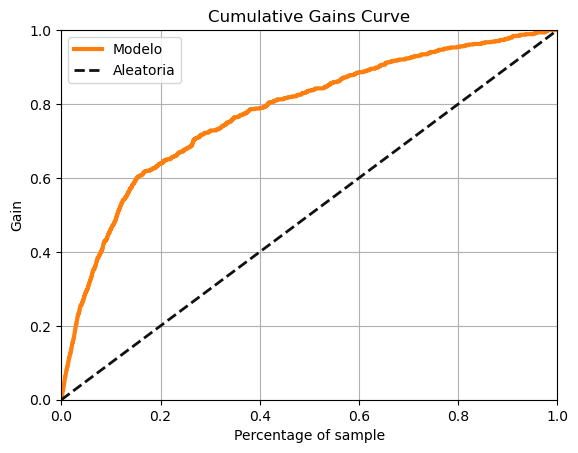

In [62]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

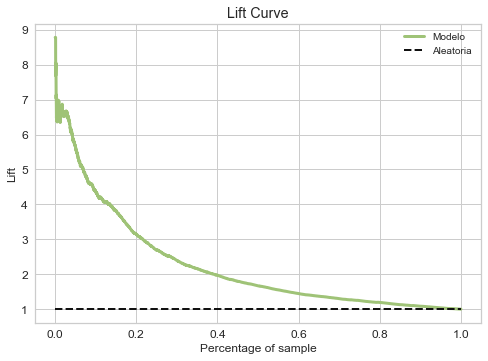

In [40]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

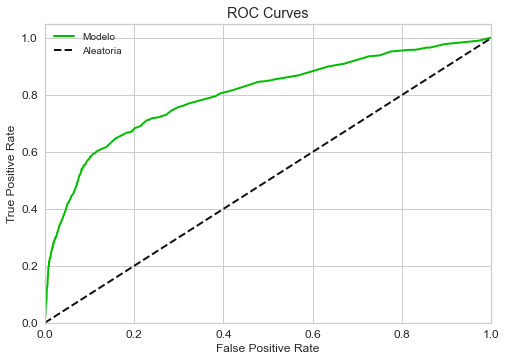

In [41]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);